In [ ]:
#*********** HARJEET SINGH YADAV ****************
#*********** ROLL NO:- 2020561 ******************
#*********** IIS ASSIGNMENT 2 *******************
#*********** LOGISTICS REGRESSION ***************

In [1]:
# important libraries for the models
import os 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report

In [2]:
# fetching the data tables form system
data = pd.read_excel(r"C:\Users\Harjeet\Downloads\Data for IIS-Lab Assignment.xlsx")
data.head(5)

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,High-Salary
0,203097,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,...,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,1
1,579905,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,...,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,1
2,810601,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,...,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,1
3,267447,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,...,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,1
4,343523,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,...,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0


In [3]:
print(data.shape)

(3998, 34)


<AxesSubplot:xlabel='High-Salary', ylabel='count'>

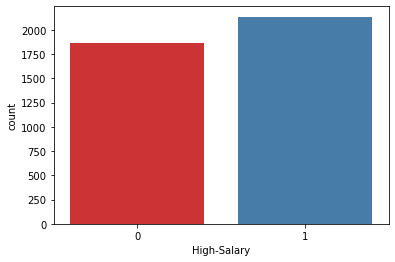

In [4]:
sns.countplot(x = 'High-Salary', data = data, palette = 'Set1')
#this is to check wheather our data set is balanced or not i.e equal distribution of 0 and 1

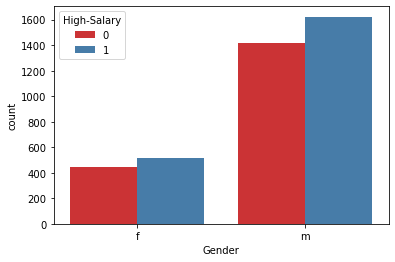

In [5]:
sns.countplot(x = 'Gender' , data =data, palette = 'Set1', hue ='High-Salary')
plt.show()

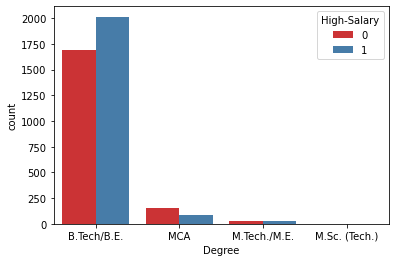

In [6]:
sns.countplot(x = 'Degree' , data =data, palette = 'Set1', hue ='High-Salary')
plt.show()

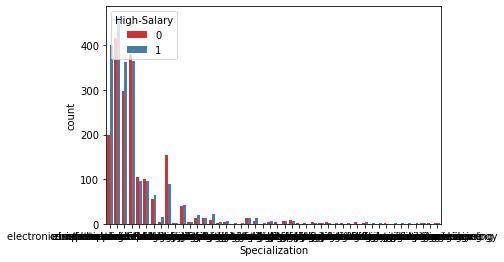

In [7]:
sns.countplot(x = 'Specialization' , data =data, palette = 'Set1', hue ='High-Salary')
plt.show()

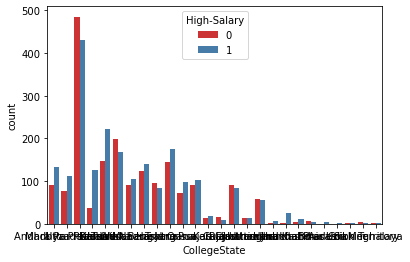

In [8]:
sns.countplot(x = 'CollegeState' , data =data, palette = 'Set1', hue ='High-Salary')
plt.show()

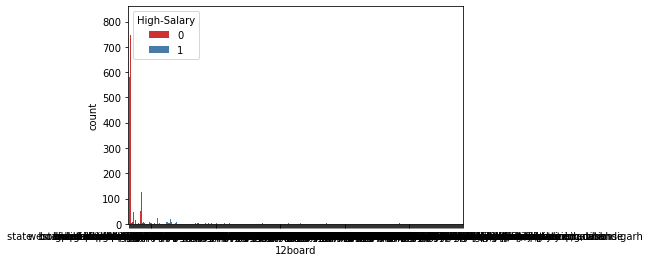

In [9]:
sns.countplot(x = '12board' , data =data, palette = 'Set1', hue ='High-Salary')
plt.show()

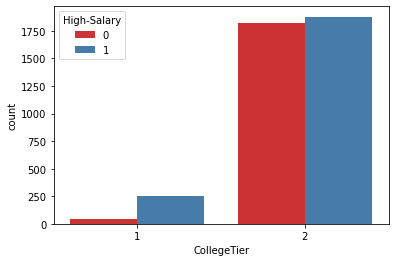

In [10]:
sns.countplot(x = 'CollegeTier' , data =data, palette = 'Set1', hue ='High-Salary')
plt.show()

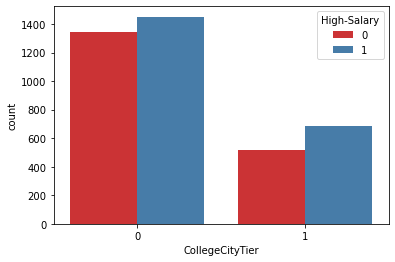

In [11]:
sns.countplot(x = 'CollegeCityTier' , data =data, palette = 'Set1', hue ='High-Salary')
plt.show()

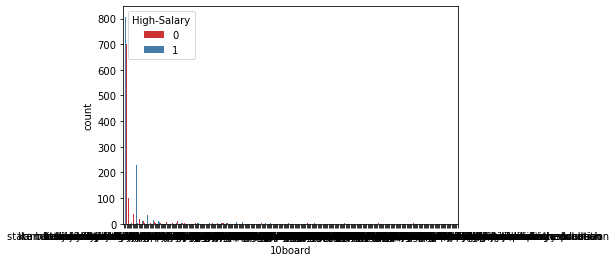

In [12]:
sns.countplot(x = '10board' , data =data, palette = 'Set1', hue ='High-Salary')
plt.show()

In [13]:
#dropping the irrelevent comlumns for the table
data=data.drop(columns=['ID','DOB','CollegeID','CollegeCityID','10board','12board','12graduation','CollegeState'])

In [14]:
data.columns

Index(['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityTier', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'High-Salary'],
      dtype='object')

In [15]:
#converting the string feature into numerical features
string_features=[ 'Degree','Gender','Specialization']
new_data = pd.get_dummies(data, columns = string_features)

In [16]:
new_data.head()

,10percentage,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,...,Specialization_internal combustion engine,Specialization_mechanical & production engineering,Specialization_mechanical and automation,Specialization_mechanical engineering,Specialization_mechatronics,Specialization_metallurgical engineering,Specialization_other,Specialization_polymer technology,Specialization_power systems and automation,Specialization_telecommunication engineering
0,84.3,95.8,2,78.00,0,2011,515,585,525,0.635979,...,0,0,0,0,0,0,0,0,0,0
1,85.4,85.0,2,70.06,0,2012,695,610,780,0.960603,...,0,0,0,0,0,0,0,0,0,0
2,85.0,68.2,2,70.00,0,2014,615,545,370,0.450877,...,0,0,0,0,0,0,0,0,0,0
3,85.6,83.6,1,74.64,1,2011,635,585,625,0.974396,...,0,0,0,0,0,0,0,0,0,0
4,78.0,76.8,2,73.90,0,2012,545,625,465,0.124502,...,0,0,0,0,0,0,0,0,0,0


In [17]:
print(new_data.shape)

(3998, 75)


In [18]:
#splitting data in X and Y
X=new_data.drop('High-Salary',axis=1).values
Y=new_data['High-Salary']

In [19]:
print(X.shape)
print(Y.shape)

(3998, 74)
(3998,)


In [20]:
#decision classifier for chechking the impotance for each fearture into the logical regression model
decision_tree = DecisionTreeClassifier(random_state=20, criterion = 'entropy', max_depth = 20)
decision_tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=20)

In [21]:
#printing the corresponding importance 
for i,col in enumerate(new_data.drop('High-Salary',axis=1)):
    print("The feature importance of",col,"is",decision_tree.feature_importances_[i],sep=' ')

The feature importance of 10percentage is 0.10391801217239643
The feature importance of 12percentage is 0.06040360327478826
The feature importance of CollegeTier is 0.00877443952883037
The feature importance of collegeGPA is 0.0867244333857451
The feature importance of CollegeCityTier is 0.006639616785000923
The feature importance of GraduationYear is 0.035996088067742224
The feature importance of English is 0.07887403203893938
The feature importance of Logical is 0.056470536780861065
The feature importance of Quant is 0.13576210809471703
The feature importance of Domain is 0.04243050144463206
The feature importance of ComputerProgramming is 0.054522704578182535
The feature importance of ElectronicsAndSemicon is 0.006889356943992598
The feature importance of ComputerScience is 0.009135395835243015
The feature importance of MechanicalEngg is 0.004322948284507776
The feature importance of ElectricalEngg is 0.006594768426701754
The feature importance of TelecomEngg is 0.008849380542721818

In [22]:
#printing the corresponidng data frames
f_imp_col = []
f_imp = []

for i,col in enumerate(new_data.drop('High-Salary',axis=1)):
    f_imp_col.append(col)
    f_imp.append(decision_tree.feature_importances_[i])

fi_df = zip(f_imp_col, f_imp)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df

# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

fi_df

,index,Feature,Feature Importance
0,8,Quant,0.135762
1,0,10percentage,0.103918
2,3,collegeGPA,0.086724
3,6,English,0.078874
4,1,12percentage,0.060404
...,...,...,...
69,45,Specialization_electrical engineering,0.000000
70,46,Specialization_electronics,0.000000
71,23,Degree_M.Sc. (Tech.),0.000000
72,28,Specialization_aeronautical engineering,0.000000


In [23]:
#choosing the important features whose impotance in not 0
imp_features=[]
for i,col in enumerate(new_data.drop('High-Salary',axis=1)):
    if(decision_tree.feature_importances_[i]!=0):
        imp_features.append(col)

In [24]:
len(imp_features)
imp_features

['10percentage',
 '12percentage',
 'CollegeTier',
 'collegeGPA',
 'CollegeCityTier',
 'GraduationYear',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'Degree_B.Tech/B.E.',
 'Degree_M.Tech./M.E.',
 'Gender_f',
 'Gender_m',
 'Specialization_civil engineering',
 'Specialization_computer application',
 'Specialization_computer engineering',
 'Specialization_computer science & engineering',
 'Specialization_electronics & instrumentation eng',
 'Specialization_electronics & telecommunications',
 'Specialization_electronics and communication engineering',
 'Specialization_electronics and instrumentation engineering',
 'Specialization_information technology',
 'Specialization_mechanical engineering']

In [25]:
print(new_data.shape)
print(new_data[imp_features].shape)

(3998, 75)
(3998, 35)


In [26]:
x=new_data[imp_features].values
y=new_data['High-Salary']

In [27]:
print(x.shape)
print(y.shape)

(3998, 35)
(3998,)


In [28]:
#splitting into 60 : 40 train and test data set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.6, test_size=0.4, random_state=15)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(2398, 35)
(1600, 35)
(2398,)
(1600,)


<AxesSubplot:xlabel='High-Salary', ylabel='count'>

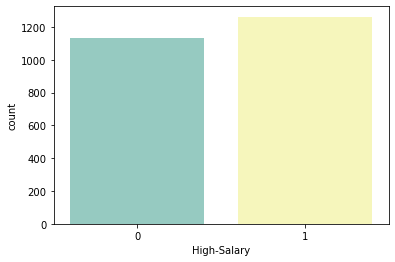

In [29]:
# distribution of 0 and 1 in training samples

sns.countplot(x = y_train, palette = 'Set3')

<AxesSubplot:xlabel='High-Salary', ylabel='count'>

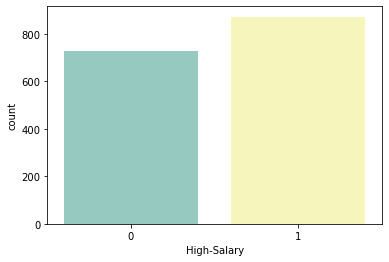

In [30]:
# distribution of 0 and 1 in testing samples

sns.countplot(x = y_test, palette = 'Set3')

In [46]:
#training the model
log_reg_model = LogisticRegression(random_state=20, solver='liblinear', max_iter=1000 , C= 0.162378)
log_reg_model.fit(x_train, y_train)

LogisticRegression(C=0.162378, max_iter=1000, random_state=20,
                   solver='liblinear')

In [56]:
y_pred = log_reg_model.predict(x_test)
pred_proba = log_reg_model.predict_proba(x_train)

In [57]:
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [58]:
y_pred.shape

(1600,)

In [59]:
print("The Training data Accuracy is: ", log_reg_model.score(x_train, y_train))

The Training data Accuracy is:  0.7164303586321935


In [60]:
print("The testing data Accuracy is: ", log_reg_model.score(x_test, y_test))

The testing data Accuracy is:  0.721875


In [61]:
#class wise frequency 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       728
           1       0.74      0.75      0.75       872

    accuracy                           0.72      1600
   macro avg       0.72      0.72      0.72      1600
weighted avg       0.72      0.72      0.72      1600



In [62]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

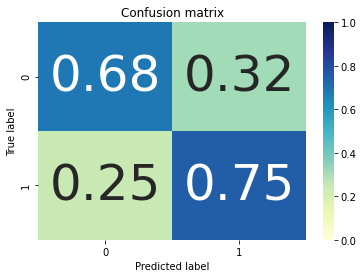

In [63]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg_model.classes_, title='Confusion matrix')

In [64]:
print("class     accuracy")
print(" 0     ",cm_norm[0][0])
print(" 1     ",cm_norm[1][1])

class     accuracy
 0      0.6840659340659341
 1      0.7534403669724771


In [44]:
#HYPER PARAMETER TUNNING METHOD TO FIND THE GLOBAL MINIMUM AND MINIMIZE THE LOSS
C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'liblinear', C=c)
    log_reg2.fit(x_train, y_train)
    score = log_reg2.score(x_test, y_test)
    CA.append(score)
    
CA2 = np.array(CA).reshape(20,)
#zip
outcomes = zip(C_List, CA2)
#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'accuracy'])
#print
df_outcomes
df_outcomes.sort_values("accuracy", ascending = False).reset_index()

,index,C_List,accuracy
0,8,0.162378,0.724375
1,7,0.048329,0.721875
2,10,1.832981,0.720625
3,4,0.001274,0.720625
4,16,2636.650899,0.720000
5,9,0.545559,0.719375
6,11,6.158482,0.718750
7,18,29763.514416,0.718125
8,14,233.572147,0.718125
9,19,100000.000000,0.717500


In [ ]:
# splitting data into 70 % and 30 %

In [65]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, train_size = 0.7, test_size=0.3, random_state=15)


print(x_train2.shape)
print(x_test2.shape)


print(y_train2.shape)
print(y_test2.shape)

(2798, 35)
(1200, 35)
(2798,)
(1200,)


<AxesSubplot:xlabel='High-Salary', ylabel='count'>

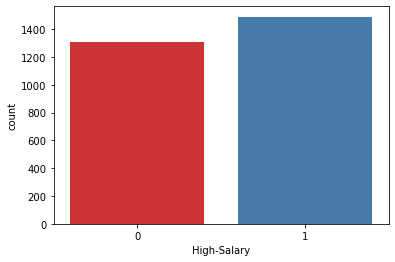

In [66]:
sns.countplot(x = y_train2, palette = 'Set1')

<AxesSubplot:xlabel='High-Salary', ylabel='count'>

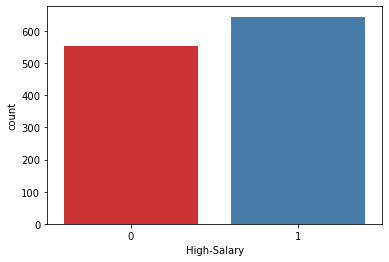

In [67]:
sns.countplot(x = y_test2, palette = 'Set1')

In [79]:
#training the model
log_reg_model2 = LogisticRegression(random_state=20, solver='liblinear', max_iter=1000, C= 0.048329 )
log_reg_model2.fit(x_train2, y_train2)

LogisticRegression(C=0.048329, max_iter=1000, random_state=20,
                   solver='liblinear')

In [80]:
y_pred2 = log_reg_model2.predict(x_test2)
pred_proba2 = log_reg_model2.predict_proba(x_train2)

In [81]:
y_pred2

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [82]:
print("The Training data Accuracy is: ", log_reg_model2.score(x_train2, y_train2))

The Training data Accuracy is:  0.7172980700500358


In [83]:
print("The testing data Accuracy is: ", log_reg_model2.score(x_test2, y_test2))

The testing data Accuracy is:  0.7208333333333333


In [84]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69       555
           1       0.73      0.76      0.74       645

    accuracy                           0.72      1200
   macro avg       0.72      0.72      0.72      1200
weighted avg       0.72      0.72      0.72      1200



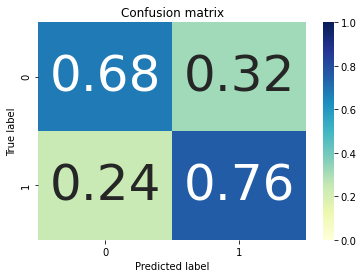

In [85]:
#classcification report
cm2 = confusion_matrix(y_test2, y_pred2)
cm_norm2 = cm2 / cm2.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm2, classes = log_reg_model2.classes_, title='Confusion matrix')

In [86]:
print("class     accuracy")
print(" 0     ",cm_norm2[0][0])
print(" 1     ",cm_norm2[1][1])

class     accuracy
 0      0.6810810810810811
 1      0.7550387596899225


In [77]:
#HYPER PARAMETER TUNNING METHOD TO FIND THE GLOBAL MINIMUM AND MINIMIZE THE LOSS
C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'liblinear', C=c)
    log_reg2.fit(x_train2, y_train2)
    score = log_reg2.score(x_test2, y_test2)
    CA.append(score)
    
CA2 = np.array(CA).reshape(20,)
#zip
outcomes = zip(C_List, CA2)
#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'accuracy'])
#print
df_outcomes
df_outcomes.sort_values("accuracy", ascending = False).reset_index()

,index,C_List,accuracy
0,7,0.048329,0.720833
1,6,0.014384,0.719167
2,8,0.162378,0.718333
3,4,0.001274,0.715000
4,13,69.519280,0.714167
5,3,0.000379,0.713333
6,11,6.158482,0.712500
7,2,0.000113,0.712500
8,17,8858.667904,0.712500
9,9,0.545559,0.710833


In [56]:
#splitting the data into 80% and 20%

In [87]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, train_size = 0.8, test_size=0.2, random_state=15)

print(x_train3.shape)
print(x_test3.shape)

print(y_train3.shape)
print(y_test3.shape)

(3198, 35)
(800, 35)
(3198,)
(800,)


<AxesSubplot:xlabel='High-Salary', ylabel='count'>

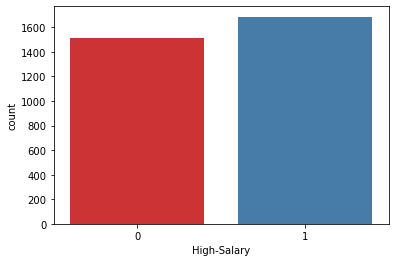

In [88]:
sns.countplot(x = y_train3, palette = 'Set1')

In [97]:
#training the model
log_reg_model3 = LogisticRegression(random_state=20, solver='liblinear', max_iter=1000 , C=0.001274 )
log_reg_model3.fit(x_train3, y_train3)

LogisticRegression(C=0.001274, max_iter=1000, random_state=20,
                   solver='liblinear')

In [98]:
y_pred3 = log_reg_model3.predict(x_test3)

In [99]:
print("The Training data Accuracy is: ", log_reg_model3.score(x_train3, y_train3))

The Training data Accuracy is:  0.7091932457786116


In [100]:
print("The testing data Accuracy is: ", log_reg_model3.score(x_test3, y_test3))

The testing data Accuracy is:  0.73375


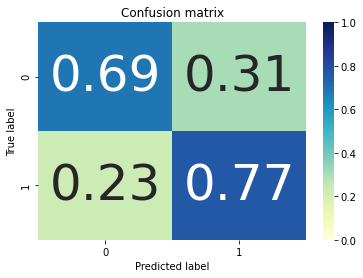

In [101]:
cm3 = confusion_matrix(y_test3, y_pred3)
cm_norm3 = cm3 / cm3.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm3, classes = log_reg_model3.classes_, title='Confusion matrix')

In [102]:
print("class     accuracy")
print(" 0     ",cm_norm3[0][0])
print(" 1     ",cm_norm3[1][1])

class     accuracy
 0      0.6923076923076923
 1      0.7661469933184856


In [96]:
#HYPER PARAMETER TUNNING METHOD TO FIND THE GLOBAL MINIMUM AND MINIMIZE THE LOSS
C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'liblinear', C=c)
    log_reg2.fit(x_train3, y_train3)
    score = log_reg2.score(x_test3, y_test3)
    CA.append(score)
    
CA2 = np.array(CA).reshape(20,)
#zip
outcomes = zip(C_List, CA2)
#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'accuracy'])
#print
df_outcomes
df_outcomes.sort_values("accuracy", ascending = False).reset_index()

,index,C_List,accuracy
0,4,0.001274,0.73375
1,3,0.000379,0.73125
2,17,8858.667904,0.73125
3,15,784.759970,0.73125
4,11,6.158482,0.73125
5,12,20.691381,0.73125
6,10,1.832981,0.73000
7,18,29763.514416,0.73000
8,5,0.004281,0.73000
9,6,0.014384,0.73000


In [64]:
#splitting the data into 90% and 10%

In [103]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, train_size = 0.9, test_size=0.1, random_state=15)

print(x_train4.shape)
print(x_test4.shape)

print(y_train4.shape)
print(y_test4.shape)

(3598, 35)
(400, 35)
(3598,)
(400,)


<AxesSubplot:xlabel='High-Salary', ylabel='count'>

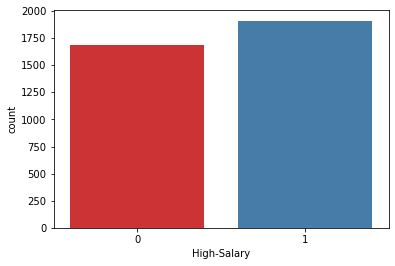

In [104]:
sns.countplot(x = y_train4, palette = 'Set1')

In [115]:
#training the model
log_reg_model4 = LogisticRegression(random_state=20, solver='liblinear', max_iter=1000 ,C=0.001274)
log_reg_model4.fit(x_train4, y_train4)

LogisticRegression(C=0.001274, max_iter=1000, random_state=20,
                   solver='liblinear')

In [116]:
y_pred4 = log_reg_model4.predict(x_test4)

In [117]:
print("The Training data Accuracy is: ", log_reg_model4.score(x_train4, y_train4))

The Training data Accuracy is:  0.7112284602556976


In [118]:
print("The testing data Accuracy is: ", log_reg_model4.score(x_test4, y_test4))

The testing data Accuracy is:  0.7425


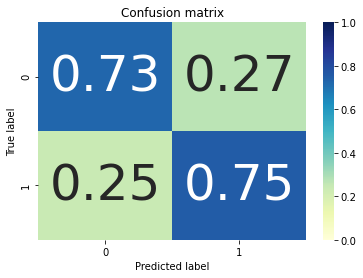

In [119]:
cm4 = confusion_matrix(y_test4, y_pred4)
cm_norm4 = cm4 / cm4.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm4, classes = log_reg_model4.classes_, title='Confusion matrix')

In [121]:
print("class     accuracy")
print(" 0     ",cm_norm4[0][0])
print(" 1     ",cm_norm4[1][1])

class     accuracy
 0      0.7272727272727273
 1      0.7544642857142857


In [114]:
#HYPER PARAMETER TUNNING METHOD TO FIND THE GLOBAL MINIMUM AND MINIMIZE THE LOSS
C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'liblinear', C=c)
    log_reg2.fit(x_train4, y_train4)
    score = log_reg2.score(x_test4, y_test4)
    CA.append(score)
    
CA2 = np.array(CA).reshape(20,)
#zip
outcomes = zip(C_List, CA2)
#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'accuracy'])
#print
df_outcomes
df_outcomes.sort_values("accuracy", ascending = False).reset_index()

,index,C_List,accuracy
0,4,0.001274,0.7450
1,2,0.000113,0.7425
2,3,0.000379,0.7400
3,5,0.004281,0.7375
4,6,0.014384,0.7350
5,1,0.000034,0.7350
6,10,1.832981,0.7300
7,7,0.048329,0.7300
8,15,784.759970,0.7300
9,13,69.519280,0.7275


In [ ]:
#THE END